In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.model_selection import train_test_split
import matplotlib
matplotlib.rcParams["figure.figsize"] = (6, 4)
plt.style.use("ggplot")
import tensorflow as tf
from tensorflow import data
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import mae
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report
import os

# Dataset and Preprocessing

In [2]:
normal_df = pd.read_csv("C:\\Users\\USER\\Downloads\\ptbdb_normal.csv\\ptbdb_normal.csv").iloc[:, :-1]
anomaly_df = pd.read_csv("C:\\Users\\USER\\Downloads\\ptbdb_abnormal.csv\\ptbdb_abnormal.csv").iloc[:, :-1]
normal_df.head()

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.55,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
print("Shape of Normal data", normal_df.shape)
print("Shape of Abnormal data", anomaly_df.shape)

Shape of Normal data (4045, 187)
Shape of Abnormal data (10505, 187)


In [4]:
CLASS_NAMES = ["Normal", "Anomaly"]

normal_df_copy = normal_df.copy()
anomaly_df_copy = anomaly_df.copy()
print(anomaly_df_copy.columns.equals(normal_df_copy.columns))

False


In [5]:
normal_df_copy = normal_df_copy.set_axis(range(1, 188), axis=1)
anomaly_df_copy = anomaly_df_copy.set_axis(range(1, 188), axis=1)
normal_df_copy = normal_df_copy.assign(target = CLASS_NAMES[0])
anomaly_df_copy = anomaly_df_copy.assign(target = CLASS_NAMES[1])


df = pd.concat((normal_df_copy, anomaly_df_copy))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14550 entries, 0 to 10504
Columns: 188 entries, 1 to target
dtypes: float64(187), object(1)
memory usage: 21.0+ MB


In [7]:
# Assuming you have imported pandas as pd and have loaded your datasets into normal_df and anomaly_df

# Extract the first 5 lines from each dataset
presentation_normal_data = normal_df.head(5)
presentation_anomaly_data = anomaly_df.head(5)

normal_df = normal_df.drop(normal_df.index[:5])
anomaly_df = anomaly_df.drop(anomaly_df.index[:5])

In [8]:
normal_df.drop("target", axis=1, errors="ignore", inplace=True)
normal = normal_df.to_numpy()
anomaly_df.drop("target", axis=1, errors="ignore", inplace=True)
anomaly = anomaly_df.to_numpy()

X_train, X_test = train_test_split(normal, test_size=0.15, random_state=45, shuffle=True)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}, anomaly shape: {anomaly.shape}")

Train shape: (3434, 187), Test shape: (606, 187), anomaly shape: (10500, 187)


In [9]:
tf.keras.utils.set_random_seed(1024)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

In [11]:
!pip install keras

In [12]:
!pip install keras tensorflow scikit-learn

In [13]:
# Define a mapping dictionary
mapping = {'Normal': 1, 'Anomaly': 0}

# Apply the mapping to the 'target' column
df['target_numeric'] = df['target'].map(mapping)

In [14]:
df.drop('target', axis=1, inplace=True)

In [15]:
# split the data into labels and features 
ecg_data = df.iloc[:,:-1]
labels = df.iloc[:,-1]

In [16]:
# Normalize the data between -1 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
ecg_data = scaler.fit_transform(ecg_data)

# Feature engineering

In [17]:
# Initializing an empty list to store the features
import scipy
features = []

# Extracting features for each sample
for i in range(X_train.shape[0]):
    #Finding the R-peaks
    r_peaks = scipy.signal.find_peaks(X_train[i])[0]

    #Initialize lists to hold R-peak and T-peak amplitudes
    r_amplitudes = []
    t_amplitudes = []

    # Iterate through R-peak locations to find corresponding T-peak amplitudes
    for r_peak in r_peaks:
        # Find the index of the T-peak (minimum value) in the interval from R-peak to R-peak + 200 samples
        t_peak = np.argmin(X_train[i][r_peak:r_peak+200]) + r_peak
        #Append the R-peak amplitude and T-peak amplitude to the lists
        r_amplitudes.append(X_train[i][r_peak])
        t_amplitudes.append(X_train[i][t_peak])

    # extracting singular value metrics from the r_amplitudes
    std_r_amp = np.std(r_amplitudes)
    mean_r_amp = np.mean(r_amplitudes)
    median_r_amp = np.median(r_amplitudes)
    sum_r_amp = np.sum(r_amplitudes)
    # extracting singular value metrics from the t_amplitudes
    std_t_amp = np.std(t_amplitudes)
    mean_t_amp = np.mean(t_amplitudes)
    median_t_amp = np.median(t_amplitudes)
    sum_t_amp = np.sum(t_amplitudes)

    # Find the time between consecutive R-peaks
    rr_intervals = np.diff(r_peaks)

    # Calculate the time duration of the data collection
    time_duration = (len(X_train[i]) - 1) / 1000 # assuming data is in ms

    # Calculate the sampling rate
    sampling_rate = len(X_train[i]) / time_duration

    # Calculate heart rate
    duration = len(X_train[i]) / sampling_rate
    heart_rate = (len(r_peaks) / duration) * 60

    # QRS duration
    qrs_duration = []
    for j in range(len(r_peaks)):
        qrs_duration.append(r_peaks[j]-r_peaks[j-1])
    # extracting singular value metrics from the qrs_durations
    std_qrs = np.std(qrs_duration)
    mean_qrs = np.mean(qrs_duration)
    median_qrs = np.median(qrs_duration)
    sum_qrs = np.sum(qrs_duration)

    # Extracting the singular value metrics from the RR-interval
    std_rr = np.std(rr_intervals)
    mean_rr = np.mean(rr_intervals)
    median_rr = np.median(rr_intervals)
    sum_rr = np.sum(rr_intervals)

    # Extracting the overall standard deviation 
    std = np.std(X_train[i])
    
    # Extracting the overall mean 
    mean = np.mean(X_train[i])

    # Appending the features to the list
    features.append([mean, std, std_qrs, mean_qrs,median_qrs, sum_qrs, std_r_amp, mean_r_amp, median_r_amp, sum_r_amp, std_t_amp, mean_t_amp, median_t_amp, sum_t_amp, sum_rr, std_rr, mean_rr,median_rr, heart_rate])

# Converting the list to a numpy array
features = np.array(features)

In [18]:
pd.DataFrame(features)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.110695,0.169359,25.304809,0.0,7.0,0.0,0.239190,0.263671,0.169695,3.164047,0.0,0.0,0.0,0.0,83.0,3.916483,7.545455,7.0,3870.967742
1,0.171821,0.168276,27.224716,0.0,3.0,0.0,0.170473,0.216273,0.168255,5.839371,0.0,0.0,0.0,0.0,137.0,4.476930,5.269231,3.5,8709.677419
2,0.116881,0.132795,20.825420,0.0,3.0,0.0,0.130701,0.141246,0.120708,7.486051,0.0,0.0,0.0,0.0,150.0,1.012496,2.884615,3.0,17096.774194
3,0.103161,0.146991,29.824487,0.0,5.5,0.0,0.212534,0.188618,0.132520,3.017886,0.0,0.0,0.0,0.0,114.0,4.963869,7.600000,6.0,5161.290323
4,0.158057,0.158278,28.385442,0.0,3.0,0.0,0.160533,0.172346,0.138205,5.170390,0.0,0.0,0.0,0.0,151.0,4.490444,5.206897,3.0,9677.419355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429,0.115418,0.152633,30.021731,0.0,5.0,0.0,0.191221,0.159438,0.111772,3.667063,0.0,0.0,0.0,0.0,139.0,4.911826,6.318182,5.5,7419.354839
3430,0.224514,0.156518,29.755952,0.0,3.5,0.0,0.139919,0.287587,0.266546,6.902085,0.0,0.0,0.0,0.0,141.0,4.683963,6.130435,4.0,7741.935484
3431,0.161698,0.133540,21.967508,0.0,3.0,0.0,0.114946,0.212006,0.192463,10.388291,0.0,0.0,0.0,0.0,152.0,1.124228,3.166667,3.0,15806.451613
3432,0.133741,0.137701,32.366887,0.0,4.0,0.0,0.182548,0.151323,0.104000,3.934400,0.0,0.0,0.0,0.0,160.0,4.955805,6.400000,4.0,8387.096774


In [19]:
# Initializing an empty list to store the features
X_test_fe = []

# Extracting features for each sample
for i in range(X_test.shape[0]):
    # Finding the R-peaks
    r_peaks = scipy.signal.find_peaks(X_test[i])[0]

    # Initialize lists to hold R-peak and T-peak amplitudes
    r_amplitudes = []
    t_amplitudes = []

    # Iterate through R-peak locations to find corresponding T-peak amplitudes
    for r_peak in r_peaks:
        # Find the index of the T-peak (minimum value) in the interval from R-peak to R-peak + 200 samples
        t_peak = np.argmin(X_test[i][r_peak:r_peak+200]) + r_peak
        # Append the R-peak amplitude and T-peak amplitude to the lists
        r_amplitudes.append(X_test[i][r_peak])
        t_amplitudes.append(X_test[i][t_peak])
    #extracting singular value metrics from the r_amplitudes
    std_r_amp = np.std(r_amplitudes)
    mean_r_amp = np.mean(r_amplitudes)
    median_r_amp = np.median(r_amplitudes)
    sum_r_amp = np.sum(r_amplitudes)
    #extracting singular value metrics from the t_amplitudes
    std_t_amp = np.std(t_amplitudes)
    mean_t_amp = np.mean(t_amplitudes)
    median_t_amp = np.median(t_amplitudes)
    sum_t_amp = np.sum(t_amplitudes)

    # Find the time between consecutive R-peaks
    rr_intervals = np.diff(r_peaks)

    # Calculate the time duration of the data collection
    time_duration = (len(X_test[i]) - 1) / 1000 # assuming data is in ms

    # Calculate the sampling rate
    sampling_rate = len(X_test[i]) / time_duration

    # Calculate heart rate
    duration = len(X_test[i]) / sampling_rate
    heart_rate = (len(r_peaks) / duration) * 60

    # QRS duration
    qrs_duration = []
    for j in range(len(r_peaks)):
        qrs_duration.append(r_peaks[j]-r_peaks[j-1])
    #extracting singular value metrics from the qrs_duartions
    std_qrs = np.std(qrs_duration)
    mean_qrs = np.mean(qrs_duration)
    median_qrs = np.median(qrs_duration)
    sum_qrs = np.sum(qrs_duration)

    # Extracting the standard deviation of the RR-interval
    std_rr = np.std(rr_intervals)
    mean_rr = np.mean(rr_intervals)
    median_rr = np.median(rr_intervals)
    sum_rr = np.sum(rr_intervals)
    
      # Extracting the standard deviation of the RR-interval
    std = np.std(X_test[i])
    
    # Extracting the mean of the RR-interval
    mean = np.mean(X_test[i])

    # Appending the features to the list
    X_test_fe.append([mean, std,  std_qrs, mean_qrs,median_qrs, sum_qrs, std_r_amp, mean_r_amp, median_r_amp, sum_r_amp, std_t_amp, mean_t_amp, median_t_amp, sum_t_amp, sum_rr, std_rr, mean_rr,median_rr,heart_rate])

# Converting the list to a numpy array
X_test_fe = np.array(X_test_fe)

# Auto-encodor

In [20]:
raw_data = df.values

In [21]:
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]


In [22]:
# Wavelet filtering
import pywt
coeffs = pywt.wavedec(data, 'db4', level=1)
threshold = np.std(coeffs[-1]) * np.sqrt(2*np.log(len(data)))
coeffs[1:] = (pywt.threshold(i, value=threshold, mode='soft') for i in coeffs[1:])
data = pywt.waverec(coeffs, 'db4')


In [23]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

In [24]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [25]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

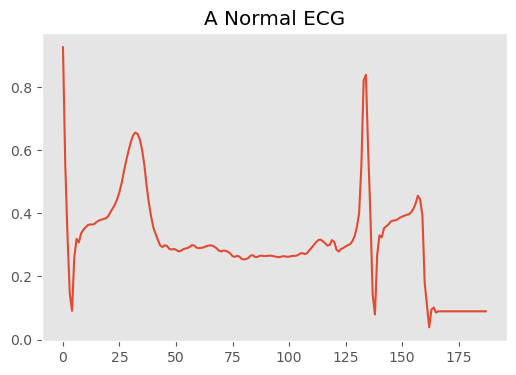

In [26]:
plt.grid()
plt.plot(np.arange(188), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

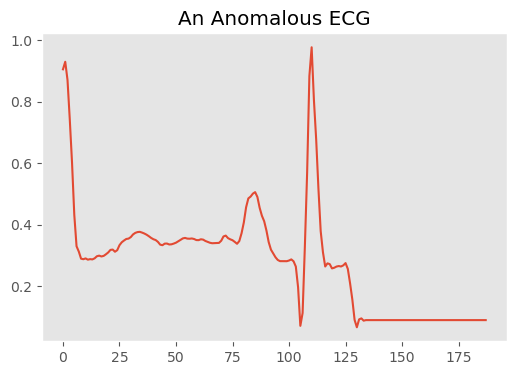

In [27]:
plt.grid()
plt.plot(np.arange(188), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

In [28]:

class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(40, activation="relu"),
      layers.Dense(20, activation="relu"),
      layers.Dense(10, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(20, activation="relu"),
      layers.Dense(40, activation="relu"),
      layers.Dense(188, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [29]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=80, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.0000e+00 - loss: 0.6913 - val_accuracy: 0.0000e+00 - val_loss: 0.6834
Epoch 2/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0000e+00 - loss: 0.6786 - val_accuracy: 0.0000e+00 - val_loss: 0.6615
Epoch 3/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.6512 - val_accuracy: 0.0000e+00 - val_loss: 0.6278
Epoch 4/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.6102 - val_accuracy: 0.0000e+00 - val_loss: 0.6038
Epoch 5/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.5764 - val_accuracy: 0.0000e+00 - val_loss: 0.5869
Epoch 6/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.5523 - val_accuracy: 0.0000e+00 - val_loss: 0.5618
Epoch 7/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3542 - loss: 0.5343 - val_accuracy: 0.8402 - val_loss: 0.5499
Epoch 8/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9297 - loss: 0

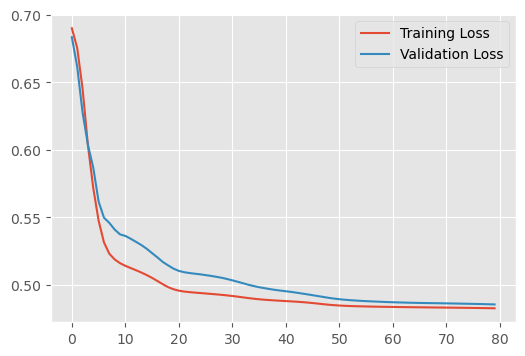

In [31]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

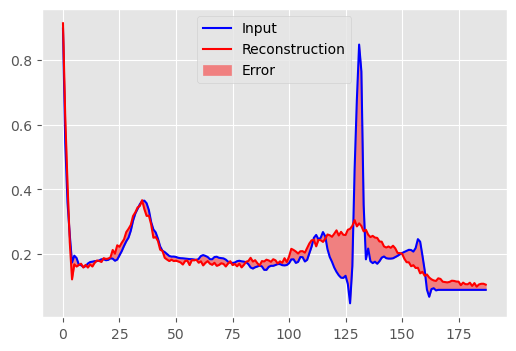

In [32]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(188), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


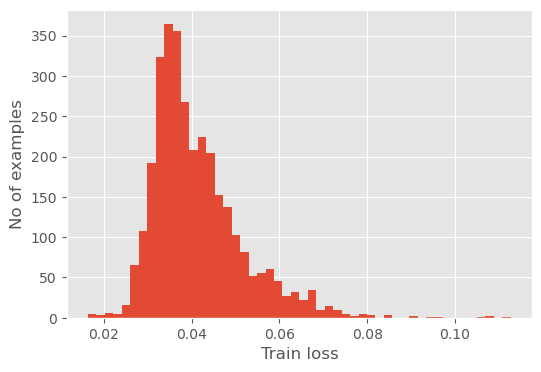

In [33]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [34]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.05156439


In [35]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [36]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.6113402061855671
Precision = 0.41367118444313494
Recall = 0.837708830548926


In [37]:
from sklearn.metrics import roc_auc_score

def print_stats(predictions, labels):
    
    # Confusion Matrix
    conf_mat = confusion_matrix(labels, predictions)
    print("Confusion Matrix:")
    print(conf_mat)
    
    # AUC Calculation
    auc_score = roc_auc_score(labels, predictions)
    print("AUC Score:", auc_score)
    
    # Additional Metrics
    print("Accuracy:", accuracy_score(labels, predictions))
    print("Precision:", precision_score(labels, predictions))
    print("Recall:", recall_score(labels, predictions))
    print("F1 Score:", f1_score(labels, predictions))  # Calculate and print F1-score

# Generate predictions
preds = predict(autoencoder, test_data, threshold)

# Print statistics
print_stats(preds, test_labels)

Confusion Matrix:
[[1077  995]
 [ 136  702]]
AUC Score: 0.6787482376682854
Accuracy: 0.6113402061855671
Precision: 0.41367118444313494
Recall: 0.837708830548926
F1 Score: 0.5538461538461539


In [38]:

class AnomalyyDetector(Model):
    def __init__(self):
        super(AnomalyyDetector, self).__init__()

        

        self.decoder = tf.keras.Sequential([
            layers.Dense(32, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(188, activation="sigmoid")])

        # Régularisation
        self.encoder = tf.keras.Sequential([
            layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
            layers.Dropout(0.2),
            layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
            layers.Dropout(0.2),
            layers.Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Instancier le modèle
autoencoderr = AnomalyyDetector()

# Ajuster les hyperparamètres
autoencoderr.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = autoencoderr.fit(normal_train_data, normal_train_data,
                          epochs=100,
                          batch_size=256,
                          validation_data=(test_data, test_data),
                          shuffle=True)




Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.1383 - loss: 0.8383 - val_accuracy: 0.8402 - val_loss: 0.7957
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9287 - loss: 0.7681 - val_accuracy: 0.8402 - val_loss: 0.7088
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9287 - loss: 0.6711 - val_accuracy: 0.8402 - val_loss: 0.6492
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9287 - loss: 0.6169 - val_accuracy: 0.8402 - val_loss: 0.6193
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9287 - loss: 0.5916 - val_accuracy: 0.8402 - val_loss: 0.5970
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9287 - loss: 0.5743 - val_accuracy: 0.8402 - val_loss: 0.5819
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9287 - loss: 0.5603 - val_accuracy: 0.8402 - val_loss: 0.5665
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9287 - loss: 0.5473 - val_accuracy: 0.8402 -

In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(data, labels)


In [40]:
labels
# Wavelet filtering
coeffs = pywt.wavedec(X_resampled, 'db4', level=1)
threshold = np.std(coeffs[-1]) * np.sqrt(2*np.log(len(X_resampled)))
coeffs[1:] = (pywt.threshold(i, value=threshold, mode='soft') for i in coeffs[1:])
X_resampled= pywt.waverec(coeffs, 'db4')
train_data, test_data, train_labels, test_labels = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=21
)
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Text(0, 0.5, "Nombre d'échantillons")

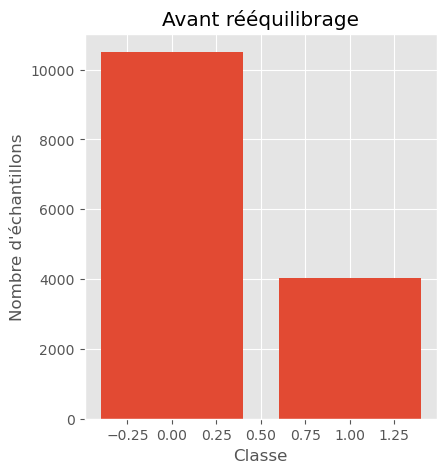

In [41]:
import matplotlib.pyplot as plt

# Compter le nombre d'échantillons pour chaque classe avant le rééquilibrage
unique_labels, counts_before = np.unique(labels, return_counts=True)

# Compter le nombre d'échantillons pour chaque classe après le rééquilibrage
unique_labels_resampled, counts_after = np.unique(y_resampled, return_counts=True)

# Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(unique_labels, counts_before)
plt.title('Avant rééquilibrage')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'échantillons')


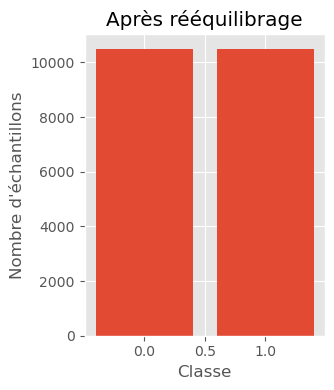

In [42]:
plt.subplot(1, 2, 2)
plt.bar(unique_labels_resampled, counts_after)
plt.title('Après rééquilibrage')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'échantillons')

plt.tight_layout()
plt.show()

In [43]:
class AnomallyDetector(Model):
    def __init__(self):
        super(AnomallyDetector, self).__init__()

        # Encoder
        self.encoder = tf.keras.Sequential([
            layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
            layers.Dropout(0.3),
            layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
            layers.Dropout(0.3),
            layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))])

        # Decoder
        self.decoder = tf.keras.Sequential([
            layers.Dense(64, activation="relu"),
            layers.Dropout(0.3),
            layers.Dense(128, activation="relu"),
            layers.Dropout(0.3),
            layers.Dense(188, activation="sigmoid")])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Instantiate the model
autoencodeer = AnomallyDetector()

# Adjust hyperparameters
autoencodeer.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = autoencodeer.fit(normal_train_data, normal_train_data,
                          epochs=150,
                          batch_size=128,
                          validation_data=(test_data, test_data),
                          shuffle=True)






Epoch 1/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.2742 - loss: 0.8854 - val_accuracy: 0.8950 - val_loss: 0.7094
Epoch 2/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9643 - loss: 0.6753 - val_accuracy: 0.8950 - val_loss: 0.6224
Epoch 3/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9643 - loss: 0.6017 - val_accuracy: 0.8950 - val_loss: 0.5756
Epoch 4/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9643 - loss: 0.5635 - val_accuracy: 0.8950 - val_loss: 0.5476
Epoch 5/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9643 - loss: 0.5408 - val_accuracy: 0.8950 - val_loss: 0.5331
Epoch 6/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9643 - loss: 0.5288 - val_accuracy: 0.8950 - val_loss: 0.5251
Epoch 7/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9643 - loss: 0.5221 - val_accuracy: 0.8950 - val_loss: 0.5202
Epoch 8/150
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9643 - loss: 0.5180 - val_accuracy: 0.8950 - v